In [98]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

from sklearn.metrics import mutual_info_score
from sklearn.feature_extraction import DictVectorizer
from sklearn.metrics import accuracy_score


In [2]:
df = pd.read_csv('employee-attrition.csv')

In [3]:
df.head()


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [7]:
df.columns

Index(['age', 'attrition', 'businesstravel', 'dailyrate', 'department',
       'distancefromhome', 'education', 'educationfield', 'employeecount',
       'employeenumber', 'environmentsatisfaction', 'gender', 'hourlyrate',
       'jobinvolvement', 'joblevel', 'jobrole', 'jobsatisfaction',
       'maritalstatus', 'monthlyincome', 'monthlyrate', 'numcompaniesworked',
       'over18', 'overtime', 'percentsalaryhike', 'performancerating',
       'relationshipsatisfaction', 'standardhours', 'stockoptionlevel',
       'totalworkingyears', 'trainingtimeslastyear', 'worklifebalance',
       'yearsatcompany', 'yearsincurrentrole', 'yearssincelastpromotion',
       'yearswithcurrmanager'],
      dtype='object')

In [8]:
df.columns = df.columns.str.lower()

In [9]:
df.dtypes

age                          int64
attrition                   object
businesstravel              object
dailyrate                    int64
department                  object
distancefromhome             int64
education                    int64
educationfield              object
employeecount                int64
employeenumber               int64
environmentsatisfaction      int64
gender                      object
hourlyrate                   int64
jobinvolvement               int64
joblevel                     int64
jobrole                     object
jobsatisfaction              int64
maritalstatus               object
monthlyincome                int64
monthlyrate                  int64
numcompaniesworked           int64
over18                      object
overtime                    object
percentsalaryhike            int64
performancerating            int64
relationshipsatisfaction     int64
standardhours                int64
stockoptionlevel             int64
totalworkingyears   

###### Data Cleaning

In [10]:
df.isnull().sum()

age                         0
attrition                   0
businesstravel              0
dailyrate                   0
department                  0
distancefromhome            0
education                   0
educationfield              0
employeecount               0
employeenumber              0
environmentsatisfaction     0
gender                      0
hourlyrate                  0
jobinvolvement              0
joblevel                    0
jobrole                     0
jobsatisfaction             0
maritalstatus               0
monthlyincome               0
monthlyrate                 0
numcompaniesworked          0
over18                      0
overtime                    0
percentsalaryhike           0
performancerating           0
relationshipsatisfaction    0
standardhours               0
stockoptionlevel            0
totalworkingyears           0
trainingtimeslastyear       0
worklifebalance             0
yearsatcompany              0
yearsincurrentrole          0
yearssince

In [11]:
df.head()

,age,attrition,businesstravel,dailyrate,department,distancefromhome,education,educationfield,employeecount,employeenumber,...,relationshipsatisfaction,standardhours,stockoptionlevel,totalworkingyears,trainingtimeslastyear,worklifebalance,yearsatcompany,yearsincurrentrole,yearssincelastpromotion,yearswithcurrmanager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [51]:
numerical_columns = list(df.dtypes[df.dtypes != 'object'].index)

In [71]:
list(df.dtypes[df.dtypes == 'object'].index)

['attrition',
 'businesstravel',
 'department',
 'educationfield',
 'gender',
 'jobrole',
 'maritalstatus',
 'over18',
 'overtime']

In [12]:
categorical_columns = list(df.dtypes[df.dtypes == 'object'].index)

for c in categorical_columns:
    df[c] = df[c].str.lower().str.replace(' ', '_')

In [13]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=11)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=11)

In [14]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [15]:
y_train = (df_train.attrition == 'yes').astype('int').values
y_val = (df_val.attrition == 'yes').astype('int').values
y_test = (df_test.attrition == 'yes').astype('int').values

In [74]:
del df_train['attrition']
del df_val['attrition']
del df_test['attrition']


KeyError: 'attrition'

In [76]:
 del categorical_columns[0]

In [77]:
categorical_columns

['businesstravel',
 'department',
 'educationfield',
 'gender',
 'jobrole',
 'maritalstatus',
 'over18',
 'overtime']

In [16]:
df.attrition.head()

0    yes
1     no
2    yes
3     no
4     no
Name: attrition, dtype: object

In [17]:
 df_full_train.attrition = (df_full_train.attrition == 'yes').astype('int').values

In [18]:
df_full_train.attrition.mean()

0.16071428571428573

In [20]:
df_full_train.head()

,age,attrition,businesstravel,dailyrate,department,distancefromhome,education,educationfield,employeecount,employeenumber,...,relationshipsatisfaction,standardhours,stockoptionlevel,totalworkingyears,trainingtimeslastyear,worklifebalance,yearsatcompany,yearsincurrentrole,yearssincelastpromotion,yearswithcurrmanager
38,36,0,travel_rarely,852,research_&_development,5,4,life_sciences,1,51,...,4,80,1,6,3,4,1,1,0,0
907,44,0,travel_rarely,1099,sales,5,3,marketing,1,1267,...,3,80,1,26,5,3,22,9,3,10
311,45,0,travel_frequently,1249,research_&_development,7,3,life_sciences,1,425,...,1,80,1,24,2,3,24,9,9,11
77,45,0,travel_rarely,193,research_&_development,6,4,other,1,101,...,2,80,0,17,3,4,0,0,0,0
287,38,0,travel_rarely,688,research_&_development,23,4,life_sciences,1,393,...,2,80,1,10,2,3,2,2,1,2


In [21]:
df_full_train.reset_index(drop=True)

,age,attrition,businesstravel,dailyrate,department,distancefromhome,education,educationfield,employeecount,employeenumber,...,relationshipsatisfaction,standardhours,stockoptionlevel,totalworkingyears,trainingtimeslastyear,worklifebalance,yearsatcompany,yearsincurrentrole,yearssincelastpromotion,yearswithcurrmanager
0,36,0,travel_rarely,852,research_&_development,5,4,life_sciences,1,51,...,4,80,1,6,3,4,1,1,0,0
1,44,0,travel_rarely,1099,sales,5,3,marketing,1,1267,...,3,80,1,26,5,3,22,9,3,10
2,45,0,travel_frequently,1249,research_&_development,7,3,life_sciences,1,425,...,1,80,1,24,2,3,24,9,9,11
3,45,0,travel_rarely,193,research_&_development,6,4,other,1,101,...,2,80,0,17,3,4,0,0,0,0
4,38,0,travel_rarely,688,research_&_development,23,4,life_sciences,1,393,...,2,80,1,10,2,3,2,2,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1171,54,0,travel_frequently,928,research_&_development,20,4,life_sciences,1,450,...,4,80,0,20,4,2,4,3,0,3
1172,43,0,non-travel,343,research_&_development,9,3,life_sciences,1,1813,...,3,80,0,7,2,2,3,2,1,2
1173,26,0,travel_frequently,1096,research_&_development,6,3,other,1,1918,...,1,80,1,8,3,3,7,7,7,7
1174,34,0,travel_rarely,479,research_&_development,7,4,medical,1,1577,...,3,80,0,1,4,1,1,0,0,0


### Exploratory data analysis

In [27]:
 df_full_train.attrition.value_counts()

0    987
1    189
Name: attrition, dtype: int64

In [26]:
global_mean= df_full_train.attrition.mean()
round(global_mean, 3)

0.161

In [31]:
df_full_train[categorical_columns].nunique()

attrition         2
businesstravel    3
department        3
educationfield    6
gender            2
jobrole           9
maritalstatus     3
over18            1
overtime          2
dtype: int64

## feature importance

In [35]:
df_full_train['businesstravel'].unique()

array(['travel_rarely', 'travel_frequently', 'non-travel'], dtype=object)

In [44]:
travel_rarely_mean = df_full_train[df_full_train.businesstravel == 'travel_rarely'].attrition.mean()
print('travel rarely', round(travel_rarely_mean,3))


travel_frequently_mean = df_full_train[df_full_train.businesstravel == 'travel_frequently'].attrition.mean()
print('travel_frequently', round(travel_frequently_mean,3))

non_travel_mean = df_full_train[df_full_train.businesstravel == 'non-travel'].attrition.mean()
print('non-travel', round(non_travel_mean,3))

travel rarely 0.146
travel_frequently 0.254
non-travel 0.085


In [45]:
for col in categorical_columns:
    df_group = df_full_train.groupby(by=col).attrition.agg(['mean'])
    df_group['diff'] = df_group['mean'] - global_mean
    df_group['risk'] = df_group['mean'] / global_mean
    display(df_group)

,mean,diff,risk
attrition,,,
0,0.0,-0.160714,0.000000
1,1.0,0.839286,6.222222


,mean,diff,risk
businesstravel,,,
non-travel,0.085470,-0.075244,0.531814
travel_frequently,0.254386,0.093672,1.582846
travel_rarely,0.145608,-0.015107,0.906003


,mean,diff,risk
department,,,
human_resources,0.220000,0.059286,1.368889
research_&_development,0.133247,-0.027467,0.829093
sales,0.212465,0.051750,1.322002


,mean,diff,risk
educationfield,,,
human_resources,0.350000,0.189286,2.177778
life_sciences,0.148760,-0.011954,0.925620
marketing,0.201613,0.040899,1.254480
medical,0.129380,-0.031334,0.805031
other,0.123288,-0.037427,0.767123
technical_degree,0.269231,0.108516,1.675214


,mean,diff,risk
gender,,,
female,0.152542,-0.008172,0.949153
male,0.166193,0.005479,1.034091


,mean,diff,risk
jobrole,,,
healthcare_representative,0.073394,-0.087320,0.456677
human_resources,0.268293,0.107578,1.669377
laboratory_technician,0.222727,0.062013,1.385859
manager,0.037037,-0.123677,0.230453
manufacturing_director,0.064220,-0.096494,0.399592
research_director,0.034483,-0.126232,0.214559
research_scientist,0.149573,-0.011142,0.930674
sales_executive,0.185039,0.024325,1.151356
sales_representative,0.385714,0.225000,2.400000


,mean,diff,risk
maritalstatus,,,
divorced,0.107692,-0.053022,0.670085
married,0.123134,-0.037580,0.766169
single,0.250000,0.089286,1.555556


,mean,diff,risk
over18,,,
y,0.160714,0.0,1.0


,mean,diff,risk
overtime,,,
no,0.102017,-0.058698,0.634770
yes,0.309309,0.148595,1.924591


In [50]:
def calculate_mi(series):
    return mutual_info_score(series, df_full_train.attrition)

df_mi = df_full_train[categorical_columns].apply(calculate_mi)
df_mi = df_mi.sort_values(ascending=False).to_frame(name='MI')


display(df_mi.head())
display(df_mi.tail())

display(df_mi)

,MI
attrition,0.440852
jobrole,0.029542
overtime,0.029511
maritalstatus,0.013545
businesstravel,0.008598


,MI
businesstravel,0.008598
educationfield,0.007542
department,0.005197
gender,0.000167
over18,0.000000


,MI
attrition,0.440852
jobrole,0.029542
overtime,0.029511
maritalstatus,0.013545
businesstravel,0.008598
educationfield,0.007542
department,0.005197
gender,0.000167
over18,0.000000


In [53]:
df_full_train[numerical_columns].corrwith(df_full_train.attrition).to_frame('correlation')


,correlation
age,-0.144131
dailyrate,-0.062133
distancefromhome,0.097253
education,-0.042965
employeecount,NaN
employeenumber,0.019228
environmentsatisfaction,-0.075472
hourlyrate,-0.016787
jobinvolvement,-0.120467
joblevel,-0.159041


In [60]:
df_full_train['employeecount'].value_counts()

1    1176
Name: employeecount, dtype: int64

In [63]:
df_full_train.groupby(by='attrition')[numerical_columns].mean()

,age,dailyrate,distancefromhome,education,employeecount,employeenumber,environmentsatisfaction,hourlyrate,jobinvolvement,joblevel,...,relationshipsatisfaction,standardhours,stockoptionlevel,totalworkingyears,trainingtimeslastyear,worklifebalance,yearsatcompany,yearsincurrentrole,yearssincelastpromotion,yearswithcurrmanager
attrition,,,,,,,,,,,,,,,,,,,,,
0,37.550152,812.700101,8.815603,2.941236,1.0,1024.977710,2.748734,65.898683,2.783181,2.105370,...,2.718338,80.0,0.833840,11.74772,2.817629,2.774063,7.256332,4.388045,2.106383,4.286727
1,33.957672,743.465608,10.952381,2.820106,1.0,1056.365079,2.523810,64.962963,2.550265,1.634921,...,2.624339,80.0,0.560847,8.21164,2.640212,2.656085,5.079365,3.015873,2.074074,2.862434


In [64]:
df_train

,age,attrition,businesstravel,dailyrate,department,distancefromhome,education,educationfield,employeecount,employeenumber,...,relationshipsatisfaction,standardhours,stockoptionlevel,totalworkingyears,trainingtimeslastyear,worklifebalance,yearsatcompany,yearsincurrentrole,yearssincelastpromotion,yearswithcurrmanager
0,33,no,travel_rarely,501,research_&_development,15,2,medical,1,2009,...,1,80,1,10,6,3,9,7,8,1
1,48,no,travel_rarely,1236,research_&_development,1,4,life_sciences,1,664,...,1,80,1,21,3,1,3,2,0,2
2,40,no,travel_rarely,1194,research_&_development,1,3,life_sciences,1,1822,...,4,80,1,12,3,3,5,3,0,3
3,42,no,travel_rarely,419,sales,12,4,marketing,1,1943,...,3,80,2,14,4,3,0,0,0,0
4,36,no,travel_rarely,1299,research_&_development,27,3,medical,1,13,...,2,80,2,17,3,2,7,7,7,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
877,29,no,travel_rarely,1378,research_&_development,13,2,other,1,2053,...,1,80,1,10,2,3,4,3,0,3
878,50,yes,travel_frequently,562,sales,8,2,technical_degree,1,723,...,1,80,1,18,4,3,4,3,1,3
879,35,no,travel_frequently,482,research_&_development,4,4,life_sciences,1,1350,...,2,80,0,9,3,3,9,6,1,1
880,46,no,travel_frequently,1211,sales,5,4,marketing,1,62,...,3,80,0,14,4,3,9,6,0,8


### Model training

In [78]:
train_dict = df_train[categorical_columns+numerical_columns].to_dict(orient='records')


In [79]:
train_dict[0]

{'businesstravel': 'travel_rarely',
 'department': 'research_&_development',
 'educationfield': 'medical',
 'gender': 'female',
 'jobrole': 'healthcare_representative',
 'maritalstatus': 'married',
 'over18': 'y',
 'overtime': 'yes',
 'age': 33,
 'dailyrate': 501,
 'distancefromhome': 15,
 'education': 2,
 'employeecount': 1,
 'employeenumber': 2009,
 'environmentsatisfaction': 2,
 'hourlyrate': 95,
 'jobinvolvement': 3,
 'joblevel': 2,
 'jobsatisfaction': 4,
 'monthlyincome': 4878,
 'monthlyrate': 21653,
 'numcompaniesworked': 0,
 'percentsalaryhike': 13,
 'performancerating': 3,
 'relationshipsatisfaction': 1,
 'standardhours': 80,
 'stockoptionlevel': 1,
 'totalworkingyears': 10,
 'trainingtimeslastyear': 6,
 'worklifebalance': 3,
 'yearsatcompany': 9,
 'yearsincurrentrole': 7,
 'yearssincelastpromotion': 8,
 'yearswithcurrmanager': 1}

In [80]:
dv = DictVectorizer(sparse=False)
dv.fit(train_dict)

DictVectorizer(sparse=False)

In [81]:
X_train = dv.transform(train_dict)

In [82]:
X_train.shape

(882, 55)

In [83]:
dv.get_feature_names()

C:\Users\ivtpr\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['age',
 'businesstravel=non-travel',
 'businesstravel=travel_frequently',
 'businesstravel=travel_rarely',
 'dailyrate',
 'department=human_resources',
 'department=research_&_development',
 'department=sales',
 'distancefromhome',
 'education',
 'educationfield=human_resources',
 'educationfield=life_sciences',
 'educationfield=marketing',
 'educationfield=medical',
 'educationfield=other',
 'educationfield=technical_degree',
 'employeecount',
 'employeenumber',
 'environmentsatisfaction',
 'gender=female',
 'gender=male',
 'hourlyrate',
 'jobinvolvement',
 'joblevel',
 'jobrole=healthcare_representative',
 'jobrole=human_resources',
 'jobrole=laboratory_technician',
 'jobrole=manager',
 'jobrole=manufacturing_director',
 'jobrole=research_director',
 'jobrole=research_scientist',
 'jobrole=sales_executive',
 'jobrole=sales_representative',
 'jobsatisfaction',
 'maritalstatus=divorced',
 'maritalstatus=married',
 'maritalstatus=single',
 'monthlyincome',
 'monthlyrate',
 'numcompanie

In [84]:
from sklearn.linear_model import LogisticRegression



In [85]:
model = LogisticRegression(solver='liblinear', random_state=1)
model.fit(X_train, y_train)

LogisticRegression(random_state=1, solver='liblinear')

In [86]:
val_dict = df_val[categorical_columns + numerical_columns].to_dict(orient='records')
X_val = dv.transform(val_dict)

In [87]:
model.predict_proba(X_val)

array([[4.22707904e-01, 5.77292096e-01],
       [6.97950837e-01, 3.02049163e-01],
       [8.40330697e-01, 1.59669303e-01],
       [3.64856902e-01, 6.35143098e-01],
       [9.98791899e-01, 1.20810105e-03],
       [9.99089538e-01, 9.10461820e-04],
       [7.82192157e-01, 2.17807843e-01],
       [9.82642002e-01, 1.73579977e-02],
       [7.67558753e-01, 2.32441247e-01],
       [9.82685662e-01, 1.73143381e-02],
       [7.93249547e-01, 2.06750453e-01],
       [9.43973674e-01, 5.60263263e-02],
       [9.84623783e-01, 1.53762168e-02],
       [7.72096332e-01, 2.27903668e-01],
       [9.68057961e-01, 3.19420386e-02],
       [9.66927813e-01, 3.30721866e-02],
       [5.10311249e-01, 4.89688751e-01],
       [7.86316758e-01, 2.13683242e-01],
       [4.75662375e-01, 5.24337625e-01],
       [9.75575338e-01, 2.44246623e-02],
       [9.36910413e-01, 6.30895868e-02],
       [9.09554495e-01, 9.04455052e-02],
       [9.98151904e-01, 1.84809642e-03],
       [7.88953687e-01, 2.11046313e-01],
       [8.492481

In [88]:
y_pred = model.predict_proba(X_val)[:, 1]

In [89]:
y_pred

array([5.77292096e-01, 3.02049163e-01, 1.59669303e-01, 6.35143098e-01,
       1.20810105e-03, 9.10461820e-04, 2.17807843e-01, 1.73579977e-02,
       2.32441247e-01, 1.73143381e-02, 2.06750453e-01, 5.60263263e-02,
       1.53762168e-02, 2.27903668e-01, 3.19420386e-02, 3.30721866e-02,
       4.89688751e-01, 2.13683242e-01, 5.24337625e-01, 2.44246623e-02,
       6.30895868e-02, 9.04455052e-02, 1.84809642e-03, 2.11046313e-01,
       1.50751821e-01, 3.62189728e-03, 4.22194722e-02, 5.09806739e-01,
       2.96624984e-02, 6.11617889e-02, 4.82107596e-02, 2.38940570e-03,
       1.40793830e-02, 5.75503860e-02, 7.02686896e-01, 2.42595706e-01,
       5.05398869e-03, 7.27152991e-02, 3.17297545e-02, 1.75313707e-02,
       2.77636228e-02, 1.71073971e-01, 1.22455632e-01, 7.36026115e-02,
       1.06943656e-01, 7.16506404e-01, 2.36911602e-02, 7.51767826e-03,
       1.20457192e-01, 8.13675348e-03, 1.36727191e-01, 8.91715082e-02,
       3.08434647e-01, 1.08730615e-03, 2.66272495e-01, 1.83641913e-03,
      

In [90]:
att = y_pred > 0.5

In [91]:
(y_val == att).mean()

0.8639455782312925

In [92]:
model.intercept_[0]

0.0009958805352316621

In [97]:
dict(zip(dv.get_feature_names(), model.coef_[0].round(3) ))

{'age': -0.03,
 'businesstravel=non-travel': -0.391,
 'businesstravel=travel_frequently': 0.609,
 'businesstravel=travel_rarely': -0.217,
 'dailyrate': -0.0,
 'department=human_resources': 0.119,
 'department=research_&_development': -0.494,
 'department=sales': 0.376,
 'distancefromhome': 0.051,
 'education': -0.142,
 'educationfield=human_resources': 0.102,
 'educationfield=life_sciences': -0.124,
 'educationfield=marketing': 0.027,
 'educationfield=medical': -0.255,
 'educationfield=other': -0.152,
 'educationfield=technical_degree': 0.403,
 'employeecount': 0.001,
 'employeenumber': -0.0,
 'environmentsatisfaction': -0.259,
 'gender=female': -0.228,
 'gender=male': 0.229,
 'hourlyrate': 0.001,
 'jobinvolvement': -0.486,
 'joblevel': -0.228,
 'jobrole=healthcare_representative': -0.234,
 'jobrole=human_resources': 0.138,
 'jobrole=laboratory_technician': 0.36,
 'jobrole=manager': -0.014,
 'jobrole=manufacturing_director': -0.155,
 'jobrole=research_director': -0.032,
 'jobrole=resea

In [114]:
accuracy_score(y_val, y_pred >= 0.6)

0.8775510204081632

In [100]:
thresholds = np.linspace(0, 1, 21)

accuracies = []

for t in thresholds:
    acc = accuracy_score(y_val, y_pred >= t)
    accuracies.append(acc)
    print('%0.2f %0.3f' % (t, acc))

0.00 0.180
0.05 0.602
0.10 0.701
0.15 0.741
0.20 0.793
0.25 0.823
0.30 0.833
0.35 0.833
0.40 0.861
0.45 0.864
0.50 0.864
0.55 0.871
0.60 0.878
0.65 0.874
0.70 0.857
0.75 0.850
0.80 0.840
0.85 0.837
0.90 0.823
0.95 0.820
1.00 0.820


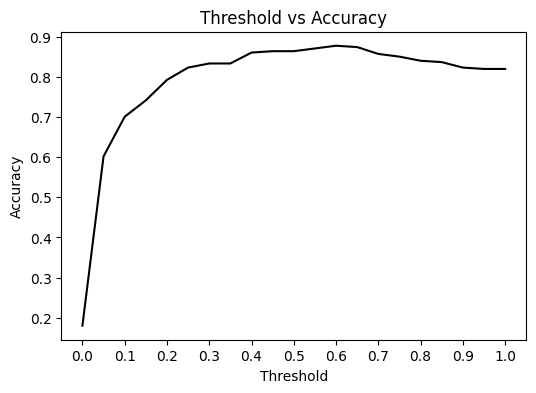

In [102]:
plt.figure(figsize=(6, 4))

plt.plot(thresholds, accuracies, color='black')

plt.title('Threshold vs Accuracy')
plt.xlabel('Threshold')
plt.ylabel('Accuracy')

plt.xticks(np.linspace(0, 1, 11))

# plt.savefig('04_threshold_accuracy.svg')

plt.show()

In [103]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

In [104]:
fpr, tpr, thresholds = roc_curve(y_val, y_pred)

In [105]:
thresholds

array([1.92304119e+00, 9.23041191e-01, 7.02686896e-01, 7.02623251e-01,
       6.35143098e-01, 6.01340675e-01, 5.97787850e-01, 5.24337625e-01,
       5.09806739e-01, 5.09415056e-01, 4.89688751e-01, 3.47348028e-01,
       3.43216745e-01, 3.40137309e-01, 3.08434647e-01, 3.02049163e-01,
       2.93814100e-01, 2.66272495e-01, 2.52779260e-01, 2.45200171e-01,
       2.42595706e-01, 2.32441247e-01, 2.28095252e-01, 2.11198599e-01,
       2.07935184e-01, 1.74816287e-01, 1.70007554e-01, 1.59669303e-01,
       1.54128434e-01, 1.43789058e-01, 1.41120457e-01, 1.36727191e-01,
       1.29571980e-01, 1.27616970e-01, 1.21752397e-01, 1.07488025e-01,
       1.06943656e-01, 1.03693645e-01, 9.82740131e-02, 9.16908304e-02,
       8.96876918e-02, 8.57610955e-02, 8.39949222e-02, 7.94230369e-02,
       7.77231300e-02, 6.38417172e-02, 6.30895868e-02, 5.79046341e-02,
       5.75503860e-02, 5.27460818e-02, 5.15891091e-02, 2.05027066e-02,
       2.03217589e-02, 3.65675692e-03, 3.62189728e-03, 2.34372834e-03,
      

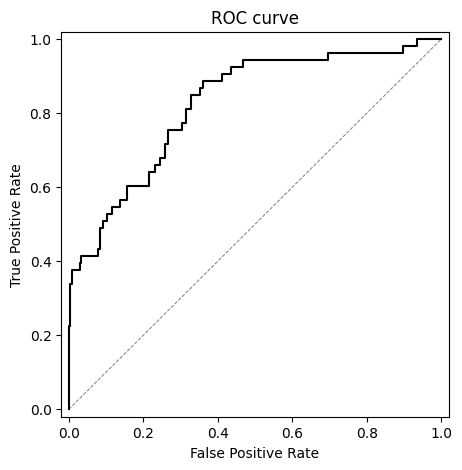

In [106]:
plt.figure(figsize=(5, 5))

plt.plot(fpr, tpr, color='black')
plt.plot([0, 1], [0, 1], color='black', lw=0.7, linestyle='dashed', alpha=0.5)

plt.xlim([-0.02, 1.02])
plt.ylim([-0.02, 1.02])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.title('ROC curve')

plt.show()

In [107]:
from sklearn.metrics import roc_auc_score

In [118]:
roc_auc_score(y_val, y_pred)

0.7988726219368981

In [109]:
import xgboost as xgb

In [110]:
dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=dv.feature_names_)
dval = xgb.DMatrix(X_val, label=y_val, feature_names=dv.feature_names_)

In [111]:
xgb_params = {
    'eta': 0.3,
    'max_depth': 6,
    'min_child_weight': 1,

    'objective': 'binary:logistic',
    'nthread': 8,
    'seed': 1
}

In [116]:
model = xgb.train(xgb_params, dtrain, num_boost_round=10)
y_pred = model.predict(dval)

In [117]:
roc_auc_score(y_val, y_pred)

0.7988726219368981

### Parameter tunning 

In [119]:
watchlist = [(dtrain, 'train'), (dval, 'val')]

In [120]:
xgb_params = {
    'eta': 0.3,
    'max_depth': 6,
    'min_child_weight': 1,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 8,
    'seed': 1
}

In [126]:
model = xgb.train(xgb_params, dtrain,
                  num_boost_round=100,
                  evals=watchlist, verbose_eval=5)

[0]	train-auc:0.84190	val-auc:0.68516
[5]	train-auc:0.99153	val-auc:0.75566
[10]	train-auc:0.99966	val-auc:0.78635
[15]	train-auc:1.00000	val-auc:0.78353
[20]	train-auc:1.00000	val-auc:0.76740
[25]	train-auc:1.00000	val-auc:0.77131
[30]	train-auc:1.00000	val-auc:0.78204
[35]	train-auc:1.00000	val-auc:0.78337
[40]	train-auc:1.00000	val-auc:0.78298
[45]	train-auc:1.00000	val-auc:0.79097
[50]	train-auc:1.00000	val-auc:0.79097
[55]	train-auc:1.00000	val-auc:0.79300
[60]	train-auc:1.00000	val-auc:0.79097
[65]	train-auc:1.00000	val-auc:0.79511
[70]	train-auc:1.00000	val-auc:0.79519
[75]	train-auc:1.00000	val-auc:0.79731
[80]	train-auc:1.00000	val-auc:0.79574
[85]	train-auc:1.00000	val-auc:0.79754
[90]	train-auc:1.00000	val-auc:0.79872
[95]	train-auc:1.00000	val-auc:0.79919
[99]	train-auc:1.00000	val-auc:0.80177


In [122]:
%%capture output

model = xgb.train(xgb_params, dtrain,
                  num_boost_round=100,
                  evals=watchlist, verbose_eval=5)

In [123]:
def parse_xgb_output(output):
    tree = []
    aucs_train = []
    aucs_val = []

    for line in output.stdout.strip().split('\n'):
        it_line, train_line, val_line = line.split('\t')

        it = int(it_line.strip('[]'))
        train = float(train_line.split(':')[1])
        val = float(val_line.split(':')[1])

        tree.append(it)
        aucs_train.append(train)
        aucs_val.append(val)

    return tree, aucs_train, aucs_val

In [124]:
tree, aucs_train, aucs_val = parse_xgb_output(output)

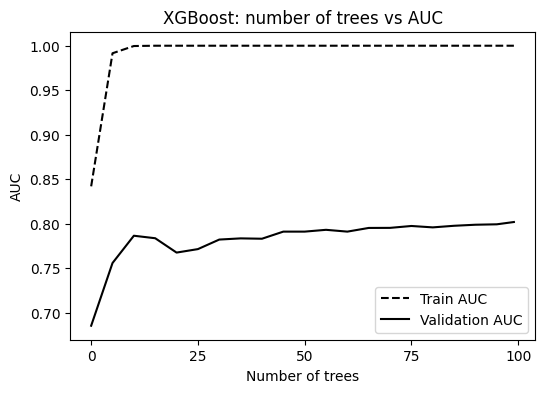

In [125]:
plt.figure(figsize=(6, 4))

plt.plot(tree, aucs_train, color='black', linestyle='dashed', label='Train AUC')
plt.plot(tree, aucs_val, color='black', linestyle='solid', label='Validation AUC')
plt.xticks(range(0, 101, 25))

plt.legend()

plt.title('XGBoost: number of trees vs AUC')
plt.xlabel('Number of trees')
plt.ylabel('AUC')

# plt.savefig('ch06-figures/06_xgb_default.svg')

plt.show()

In [127]:
%%capture output

xgb_params = {
    'eta': 0.1,
    'max_depth': 6,
    'min_child_weight': 1,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 8,
    'seed': 1,
}

model = xgb.train(xgb_params, dtrain,
                  num_boost_round=500, verbose_eval=10,
                  evals=watchlist)

In [128]:
tree, _, aucs_val_eta_01 = parse_xgb_output(output)
print(max(aucs_val_eta_01))
print(max(zip(aucs_val_eta_01, tree)))

0.81719
(0.81719, 499)


In [129]:
%%capture output

xgb_params = {
    'eta': 0.05,
    'max_depth': 6,
    'min_child_weight': 1,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 8,
    'seed': 1,
}

model = xgb.train(xgb_params, dtrain,
                  num_boost_round=500, verbose_eval=10,
                  evals=watchlist)

In [130]:
tree, _, aucs_val_eta_005 = parse_xgb_output(output)
print(max(aucs_val_eta_005))
print(max(zip(aucs_val_eta_005, tree)))

0.815
(0.815, 490)


In [131]:
%%capture output

xgb_params = {
    'eta': 0.01,
    'max_depth': 6,
    'min_child_weight': 1,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 8,
    'seed': 1,
}

model = xgb.train(xgb_params, dtrain,
                  num_boost_round=500, verbose_eval=10,
                  evals=watchlist)

In [132]:
tree, _, aucs_val_eta_001 = parse_xgb_output(output)
print(max(aucs_val_eta_001))
print(max(zip(aucs_val_eta_001, tree)))

0.81711
(0.81711, 280)


In [134]:
%%capture output

xgb_params = {
    'eta': 0.3,
    'max_depth': 6,
    'min_child_weight': 1,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 8,
    'seed': 1,
}

model = xgb.train(xgb_params, dtrain,
                  num_boost_round=500, verbose_eval=10,
                  evals=watchlist)

In [135]:
tree, _, aucs_val_eta_03 = parse_xgb_output(output)
print(max(aucs_val_eta_03))
print(max(zip(aucs_val_eta_03, tree)))

0.81508
(0.81508, 460)


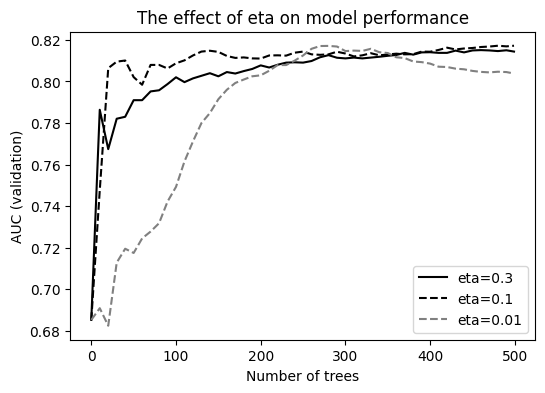

In [149]:
plt.figure(figsize=(6, 4))

plt.plot(tree, aucs_val_eta_03, color='black', linestyle='solid', label='eta=0.3')
plt.plot(tree, aucs_val_eta_01, color='black', linestyle='dashed', label='eta=0.1')
# plt.plot(tree, aucs_val_eta_005, color='grey', linestyle='solid', label='eta=0.05')
plt.plot(tree, aucs_val_eta_001, color='grey', linestyle='dashed', label='eta=0.01')

plt.xticks(range(0, 501, 100))

plt.legend()

plt.title('The effect of eta on model performance')
plt.xlabel('Number of trees')
plt.ylabel('AUC (validation)')

# plt.savefig('ch06-figures/06_xgb_eta.svg')

plt.show()

In [137]:
%%capture output

xgb_params = {
    'eta': 0.1,
    'max_depth': 3,
    'min_child_weight': 1,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 8,
    'seed': 1,
}

model = xgb.train(xgb_params, dtrain,
                  num_boost_round=500, verbose_eval=10,
                  evals=watchlist)

In [138]:
tree, _, aucs_val_mcw1 = parse_xgb_output(output)
print(max(aucs_val_mcw1))
print(max(zip(aucs_val_mcw1, tree)))

0.83716
(0.83716, 170)


In [139]:
%%capture output

xgb_params = {
    'eta': 0.1,
    'max_depth': 3,
    'min_child_weight': 10,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 8,
    'seed': 1,
}

model = xgb.train(xgb_params, dtrain,
                  num_boost_round=500, verbose_eval=10,
                  evals=watchlist)

In [140]:
tree, _, aucs_val_mcw10 = parse_xgb_output(output)
print(max(aucs_val_mcw10))
print(max(zip(aucs_val_mcw10, tree)))

0.83739
(0.83739, 430)


In [141]:
%%capture output

xgb_params = {
    'eta': 0.1,
    'max_depth': 3,
    'min_child_weight': 30,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 8,
    'seed': 1,
}

model = xgb.train(xgb_params, dtrain,
                  num_boost_round=500, verbose_eval=10,
                  evals=watchlist)

In [142]:
tree, _, aucs_val_mcw30 = parse_xgb_output(output)
print(max(aucs_val_mcw30))
print(max(zip(aucs_val_mcw30, tree)))

0.79864
(0.79864, 50)


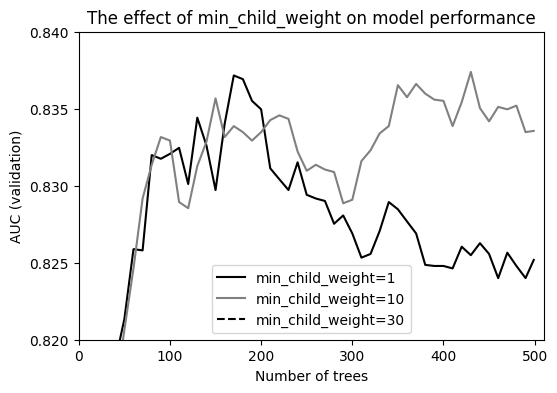

In [143]:
plt.figure(figsize=(6, 4))

plt.plot(tree, aucs_val_mcw1, color='black', linestyle='solid', label='min_child_weight=1')
plt.plot(tree, aucs_val_mcw10, color='grey', linestyle='solid', label='min_child_weight=10')
plt.plot(tree, aucs_val_mcw30, color='black', linestyle='dashed', label='min_child_weight=30')

plt.ylim(0.82, 0.84)
plt.xlim(0, 510)
plt.xticks(range(0, 501, 100))
plt.yticks(np.linspace(0.82, 0.84, 5))

plt.legend()

plt.title('The effect of min_child_weight on model performance')
plt.xlabel('Number of trees')
plt.ylabel('AUC (validation)')

# plt.savefig('ch06-figures/06_xgb_mcw.svg')

plt.show()

In [144]:
%%capture output

xgb_params = {
    'eta': 0.1,
    'max_depth': 3,
    'min_child_weight': 1,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 8,
    'seed': 1,
}

model = xgb.train(xgb_params, dtrain,
                  num_boost_round=500, verbose_eval=10,
                  evals=watchlist)

In [145]:
print(output)

[0]	train-auc:0.76941	val-auc:0.69678
[10]	train-auc:0.86264	val-auc:0.78584
[20]	train-auc:0.91646	val-auc:0.79746
[30]	train-auc:0.93890	val-auc:0.80956
[40]	train-auc:0.96166	val-auc:0.81860
[50]	train-auc:0.97474	val-auc:0.82134
[60]	train-auc:0.98121	val-auc:0.82588
[70]	train-auc:0.98655	val-auc:0.82580
[80]	train-auc:0.99019	val-auc:0.83199
[90]	train-auc:0.99139	val-auc:0.83175
[100]	train-auc:0.99320	val-auc:0.83207
[110]	train-auc:0.99458	val-auc:0.83246
[120]	train-auc:0.99591	val-auc:0.83011
[130]	train-auc:0.99688	val-auc:0.83442
[140]	train-auc:0.99829	val-auc:0.83262
[150]	train-auc:0.99910	val-auc:0.82972
[160]	train-auc:0.99940	val-auc:0.83402
[170]	train-auc:0.99971	val-auc:0.83716
[180]	train-auc:0.99991	val-auc:0.83692
[190]	train-auc:0.99995	val-auc:0.83551
[200]	train-auc:0.99996	val-auc:0.83496
[210]	train-auc:0.99996	val-auc:0.83113
[220]	train-auc:1.00000	val-auc:0.83042
[230]	train-auc:1.00000	val-auc:0.82972
[240]	train-auc:1.00000	val-auc:0.83152
[250]	train

In [146]:
tree, _, aucs_val = parse_xgb_output(output)
print(max(aucs_val))

0.83716


In [147]:
max(zip(aucs_val, tree))

(0.83716, 170)

Final Model 

In [150]:
xgb_params = {
    'eta': 0.1,
    'max_depth': 3,
    'min_child_weight': 1,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 8,
    'seed': 1,
}

model = xgb.train(xgb_params, dtrain,
                  num_boost_round=170, verbose_eval=10,
                  evals=watchlist)

[0]	train-auc:0.76941	val-auc:0.69678
[10]	train-auc:0.86264	val-auc:0.78584
[20]	train-auc:0.91646	val-auc:0.79746
[30]	train-auc:0.93890	val-auc:0.80956
[40]	train-auc:0.96166	val-auc:0.81860
[50]	train-auc:0.97474	val-auc:0.82134
[60]	train-auc:0.98121	val-auc:0.82588
[70]	train-auc:0.98655	val-auc:0.82580
[80]	train-auc:0.99019	val-auc:0.83199
[90]	train-auc:0.99139	val-auc:0.83175
[100]	train-auc:0.99320	val-auc:0.83207
[110]	train-auc:0.99458	val-auc:0.83246
[120]	train-auc:0.99591	val-auc:0.83011
[130]	train-auc:0.99688	val-auc:0.83442
[140]	train-auc:0.99829	val-auc:0.83262
[150]	train-auc:0.99910	val-auc:0.82972
[160]	train-auc:0.99940	val-auc:0.83402
[169]	train-auc:0.99971	val-auc:0.83598


In [151]:
y_pred_xgb = model.predict(dval)

In [152]:
roc_auc_score(y_val, y_pred_xgb)

0.8359821498473342

In [154]:

print(roc_auc_score(y_val, y_pred_xgb))

0.8359821498473342


In [155]:
import bentoml

In [156]:
bentoml.xgboost.save_model('employee_att',model)

Model(tag="employee_att:qip5zv25ycda2ia6", path="C:\Users\ivtpr\bentoml\models\employee_att\qip5zv25ycda2ia6\")

In [157]:
bentoml.xgboost.save_model(
    'employee_att',
    model,
    custom_objects={
        'dictVectorizer': dv
    })

Model(tag="employee_att:smqsjbc5yg7esia6", path="C:\Users\ivtpr\bentoml\models\employee_att\smqsjbc5yg7esia6\")

In [159]:
df_full_train[:1]

,age,attrition,businesstravel,dailyrate,department,distancefromhome,education,educationfield,employeecount,employeenumber,...,relationshipsatisfaction,standardhours,stockoptionlevel,totalworkingyears,trainingtimeslastyear,worklifebalance,yearsatcompany,yearsincurrentrole,yearssincelastpromotion,yearswithcurrmanager
38,36,0,travel_rarely,852,research_&_development,5,4,life_sciences,1,51,...,4,80,1,6,3,4,1,1,0,0


In [163]:
df2 = df_full_train.to_json(orient = 'records') 

In [171]:
display(df2[:101])

'[{"age":36,"attrition":0,"businesstravel":"travel_rarely","dailyrate":852,"department":"research_&_de'

In [172]:
df_full_train[:1]

,age,attrition,businesstravel,dailyrate,department,distancefromhome,education,educationfield,employeecount,employeenumber,...,relationshipsatisfaction,standardhours,stockoptionlevel,totalworkingyears,trainingtimeslastyear,worklifebalance,yearsatcompany,yearsincurrentrole,yearssincelastpromotion,yearswithcurrmanager
38,36,0,travel_rarely,852,research_&_development,5,4,life_sciences,1,51,...,4,80,1,6,3,4,1,1,0,0


In [173]:
df.head()

,age,attrition,businesstravel,dailyrate,department,distancefromhome,education,educationfield,employeecount,employeenumber,...,relationshipsatisfaction,standardhours,stockoptionlevel,totalworkingyears,trainingtimeslastyear,worklifebalance,yearsatcompany,yearsincurrentrole,yearssincelastpromotion,yearswithcurrmanager
0,41,yes,travel_rarely,1102,sales,1,2,life_sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,no,travel_frequently,279,research_&_development,8,1,life_sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,yes,travel_rarely,1373,research_&_development,2,2,other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,no,travel_frequently,1392,research_&_development,3,4,life_sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,no,travel_rarely,591,research_&_development,2,1,medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [174]:
df.columns

Index(['age', 'attrition', 'businesstravel', 'dailyrate', 'department',
       'distancefromhome', 'education', 'educationfield', 'employeecount',
       'employeenumber', 'environmentsatisfaction', 'gender', 'hourlyrate',
       'jobinvolvement', 'joblevel', 'jobrole', 'jobsatisfaction',
       'maritalstatus', 'monthlyincome', 'monthlyrate', 'numcompaniesworked',
       'over18', 'overtime', 'percentsalaryhike', 'performancerating',
       'relationshipsatisfaction', 'standardhours', 'stockoptionlevel',
       'totalworkingyears', 'trainingtimeslastyear', 'worklifebalance',
       'yearsatcompany', 'yearsincurrentrole', 'yearssincelastpromotion',
       'yearswithcurrmanager'],
      dtype='object')

In [177]:
df.columns.shape

(35,)

In [201]:
df_train = df_train[['age','businesstravel','educationfield']]

In [208]:
df_train.head()

,age,businesstravel,educationfield
0,33,travel_rarely,medical
1,48,travel_rarely,life_sciences
2,40,travel_rarely,life_sciences
3,42,travel_rarely,marketing
4,36,travel_rarely,medical


In [209]:
y_train

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,

In [202]:
dict_train = df_train.to_dict(orient='records')
#dict_val = df_val.to_dict(orient='records')

In [210]:
dict_train

[{'age': 33, 'businesstravel': 'travel_rarely', 'educationfield': 'medical'},
 {'age': 48,
  'businesstravel': 'travel_rarely',
  'educationfield': 'life_sciences'},
 {'age': 40,
  'businesstravel': 'travel_rarely',
  'educationfield': 'life_sciences'},
 {'age': 42, 'businesstravel': 'travel_rarely', 'educationfield': 'marketing'},
 {'age': 36, 'businesstravel': 'travel_rarely', 'educationfield': 'medical'},
 {'age': 20,
  'businesstravel': 'travel_rarely',
  'educationfield': 'life_sciences'},
 {'age': 22, 'businesstravel': 'travel_rarely', 'educationfield': 'medical'},
 {'age': 33, 'businesstravel': 'non-travel', 'educationfield': 'marketing'},
 {'age': 29, 'businesstravel': 'travel_rarely', 'educationfield': 'marketing'},
 {'age': 32, 'businesstravel': 'travel_rarely', 'educationfield': 'marketing'},
 {'age': 24, 'businesstravel': 'travel_rarely', 'educationfield': 'medical'},
 {'age': 53, 'businesstravel': 'travel_rarely', 'educationfield': 'medical'},
 {'age': 42,
  'businesstrave

In [211]:
dv = DictVectorizer(sparse=False)

X_train = dv.fit_transform(dict_train)
#X_val = dv.transform(dict_val)

In [212]:
dv.get_feature_names()

C:\Users\ivtpr\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['age',
 'businesstravel=non-travel',
 'businesstravel=travel_frequently',
 'businesstravel=travel_rarely',
 'educationfield=human_resources',
 'educationfield=life_sciences',
 'educationfield=marketing',
 'educationfield=medical',
 'educationfield=other',
 'educationfield=technical_degree']

In [213]:
features = dv.get_feature_names()
dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=features)
#dval = xgb.DMatrix(X_val, label=y_val, feature_names=features)

xgb_params = {
    'eta': 0.1,
    'max_depth': 3,
    'min_child_weight': 1,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 8,
    'seed': 1,
}

model = xgb.train(xgb_params, dtrain,
                  num_boost_round=170, verbose_eval=10,
                  evals=watchlist)

ValueError: feature_names mismatch: ['age', 'businesstravel=non-travel', 'businesstravel=travel_frequently', 'businesstravel=travel_rarely', 'educationfield=human_resources', 'educationfield=life_sciences', 'educationfield=marketing', 'educationfield=medical', 'educationfield=other', 'educationfield=technical_degree'] ['age', 'businesstravel=non-travel', 'businesstravel=travel_frequently', 'businesstravel=travel_rarely', 'dailyrate', 'department=human_resources', 'department=research_&_development', 'department=sales', 'distancefromhome', 'education', 'educationfield=human_resources', 'educationfield=life_sciences', 'educationfield=marketing', 'educationfield=medical', 'educationfield=other', 'educationfield=technical_degree', 'employeecount', 'employeenumber', 'environmentsatisfaction', 'gender=female', 'gender=male', 'hourlyrate', 'jobinvolvement', 'joblevel', 'jobrole=healthcare_representative', 'jobrole=human_resources', 'jobrole=laboratory_technician', 'jobrole=manager', 'jobrole=manufacturing_director', 'jobrole=research_director', 'jobrole=research_scientist', 'jobrole=sales_executive', 'jobrole=sales_representative', 'jobsatisfaction', 'maritalstatus=divorced', 'maritalstatus=married', 'maritalstatus=single', 'monthlyincome', 'monthlyrate', 'numcompaniesworked', 'over18=y', 'overtime=no', 'overtime=yes', 'percentsalaryhike', 'performancerating', 'relationshipsatisfaction', 'standardhours', 'stockoptionlevel', 'totalworkingyears', 'trainingtimeslastyear', 'worklifebalance', 'yearsatcompany', 'yearsincurrentrole', 'yearssincelastpromotion', 'yearswithcurrmanager']
training data did not have the following fields: jobrole=healthcare_representative, performancerating, numcompaniesworked, environmentsatisfaction, relationshipsatisfaction, maritalstatus=single, yearsatcompany, gender=male, hourlyrate, overtime=no, yearsincurrentrole, jobrole=human_resources, gender=female, over18=y, jobrole=research_director, jobsatisfaction, stockoptionlevel, maritalstatus=married, department=sales, jobrole=manufacturing_director, joblevel, jobrole=sales_representative, totalworkingyears, yearswithcurrmanager, jobrole=laboratory_technician, monthlyincome, jobrole=manager, education, overtime=yes, department=research_&_development, distancefromhome, monthlyrate, employeenumber, department=human_resources, jobrole=research_scientist, jobinvolvement, percentsalaryhike, trainingtimeslastyear, worklifebalance, jobrole=sales_executive, employeecount, standardhours, dailyrate, yearssincelastpromotion, maritalstatus=divorced

In [197]:
y_pred_xgb = model.predict(dval)

In [198]:
roc_auc_score(y_val, y_pred_xgb)

0.8359821498473342

In [199]:
bentoml.xgboost.save_model(
    'employee_attrition',
    model,
    custom_objects={
        'dictVectorizer': dv
    })

Model(tag="employee_attrition:qzmarxc5zgxi2ia6", path="C:\Users\ivtpr\bentoml\models\employee_attrition\qzmarxc5zgxi2ia6\")

In [186]:
dict_train[:10]

[{'age': 33,
  'businesstravel': 'travel_rarely',
  'dailyrate': 501,
  'department': 'research_&_development',
  'distancefromhome': 15,
  'education': 2,
  'educationfield': 'medical',
  'employeecount': 1,
  'employeenumber': 2009,
  'environmentsatisfaction': 2,
  'gender': 'female',
  'hourlyrate': 95,
  'jobinvolvement': 3,
  'joblevel': 2,
  'jobrole': 'healthcare_representative',
  'jobsatisfaction': 4,
  'maritalstatus': 'married',
  'monthlyincome': 4878,
  'monthlyrate': 21653,
  'numcompaniesworked': 0,
  'over18': 'y',
  'overtime': 'yes',
  'percentsalaryhike': 13,
  'performancerating': 3,
  'relationshipsatisfaction': 1,
  'standardhours': 80,
  'stockoptionlevel': 1,
  'totalworkingyears': 10,
  'trainingtimeslastyear': 6,
  'worklifebalance': 3,
  'yearsatcompany': 9,
  'yearsincurrentrole': 7,
  'yearssincelastpromotion': 8,
  'yearswithcurrmanager': 1},
 {'age': 48,
  'businesstravel': 'travel_rarely',
  'dailyrate': 1236,
  'department': 'research_&_development',
 

In [191]:
dtrain

In [192]:
dv.feature_names_

['age',
 'businesstravel=non-travel',
 'businesstravel=travel_frequently',
 'businesstravel=travel_rarely',
 'dailyrate',
 'department=human_resources',
 'department=research_&_development',
 'department=sales',
 'distancefromhome',
 'education',
 'educationfield=human_resources',
 'educationfield=life_sciences',
 'educationfield=marketing',
 'educationfield=medical',
 'educationfield=other',
 'educationfield=technical_degree',
 'employeecount',
 'employeenumber',
 'environmentsatisfaction',
 'gender=female',
 'gender=male',
 'hourlyrate',
 'jobinvolvement',
 'joblevel',
 'jobrole=healthcare_representative',
 'jobrole=human_resources',
 'jobrole=laboratory_technician',
 'jobrole=manager',
 'jobrole=manufacturing_director',
 'jobrole=research_director',
 'jobrole=research_scientist',
 'jobrole=sales_executive',
 'jobrole=sales_representative',
 'jobsatisfaction',
 'maritalstatus=divorced',
 'maritalstatus=married',
 'maritalstatus=single',
 'monthlyincome',
 'monthlyrate',
 'numcompanie

In [195]:
dv.get_feature_names_out ()

array(['age', 'businesstravel=non-travel',
       'businesstravel=travel_frequently', 'businesstravel=travel_rarely',
       'dailyrate', 'department=human_resources',
       'department=research_&_development', 'department=sales',
       'distancefromhome', 'education', 'educationfield=human_resources',
       'educationfield=life_sciences', 'educationfield=marketing',
       'educationfield=medical', 'educationfield=other',
       'educationfield=technical_degree', 'employeecount',
       'employeenumber', 'environmentsatisfaction', 'gender=female',
       'gender=male', 'hourlyrate', 'jobinvolvement', 'joblevel',
       'jobrole=healthcare_representative', 'jobrole=human_resources',
       'jobrole=laboratory_technician', 'jobrole=manager',
       'jobrole=manufacturing_director', 'jobrole=research_director',
       'jobrole=research_scientist', 'jobrole=sales_executive',
       'jobrole=sales_representative', 'jobsatisfaction',
       'maritalstatus=divorced', 'maritalstatus=marrie